<a href="https://colab.research.google.com/github/niya-c-anto/LLM/blob/main/Assignmen_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import shap
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

heart_disease = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')
heart_disease.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# number of rows and Columns in this dataset
heart_disease.info()
heart_disease= heart_disease.astype({'age':'int'})
# getting the statistical measures of the data
heart_disease.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Train Test Split
X_train, X_test, Y_train, Y_test =train_test_split(heart_disease.drop("target", axis=1),
heart_disease["target"], test_size=0.3)
#Model Training
classifier = xgb.XGBClassifier()
classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Accuracy
print('Training accuracy {:.4f}'.format(classifier.score(X_train,Y_train)))
print('Testing accuracy {:.4f}'.format(classifier.score(X_test,Y_test)))

Training accuracy 1.0000
Testing accuracy 0.9805


In [ ]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation
cv_scores = cross_val_score(classifier, X_train, Y_train,cv=5)
# Print average accuracy
print(f"Average Accuracy: {cv_scores.mean()}")

Average Accuracy: 0.9679292929292929


In [ ]:
#GridSearchCV for finding the best hyperparameters
# Define the parameter grid
param_grid = {
'n_estimators': [100, 150, 200],
'learning_rate': [0.05, 0.1, 0.15],
'max_depth': [5, 6, 7],
'subsample': [0.4, 0.5, 0.6], }

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=classifier,
param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.4, 0.5, 0.6]},
             scoring='accuracy')

In [ ]:
print('Best parameters:'

, grid_search.best_params_)

print('Best accuracy:'

, grid_search.best_score_)

#Bulding on the best parameters
classifier = xgb.XGBClassifier(learning_rate= 0.1,
max_depth= 5, n_estimators= 200, subsample=0.4)

Best parameters: {'learning_rate': 0.15, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.6}
Best accuracy: 0.9693376068376068


In [ ]:
classifier.fit(X_train, Y_train)

train_accuracy = classifier.score(X_train, Y_train)
print('Training accuracy: {:.4f}'.format(train_accuracy))
test_accuracy = classifier.score(X_test, Y_test)
print('Testing accuracy: {:.4f}'.format(test_accuracy))

Training accuracy: 0.9986
Testing accuracy: 0.9838


In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(classifier, X_train, Y_train,
cv=5)

# Print average accuracy
print(f"Average Accuracy: {cv_scores.mean()}")

Average Accuracy: 0.959566822066822


In [ ]:
# Saving the trained model
import pickle
filename = 'heart_model1.pkl'
pickle.dump(classifier, open(filename, 'wb'))

#explain prediction with the shap values
explainer=shap.Explainer(classifier)
shap_values=explainer(X_test)

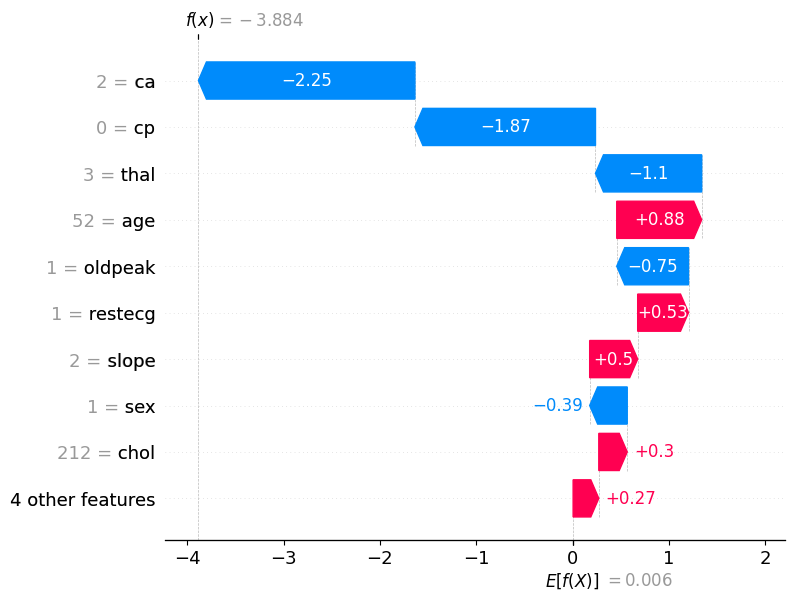

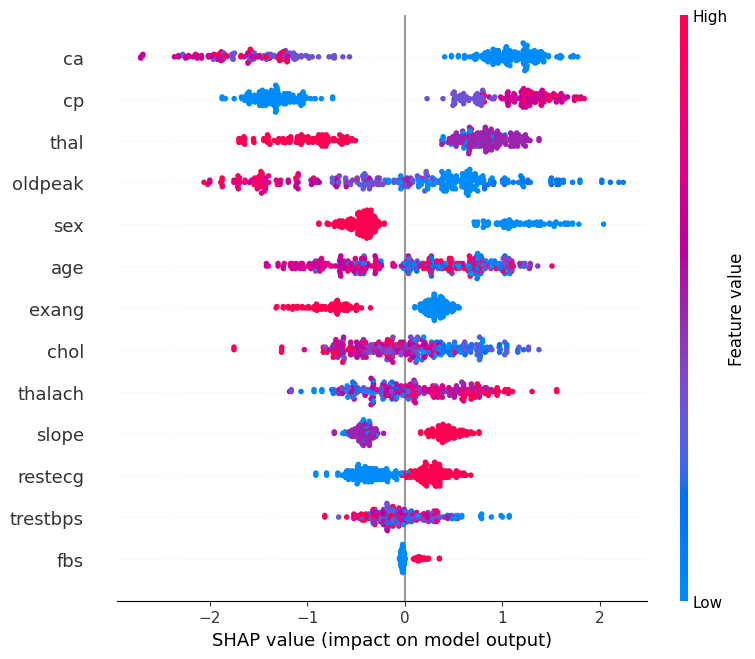

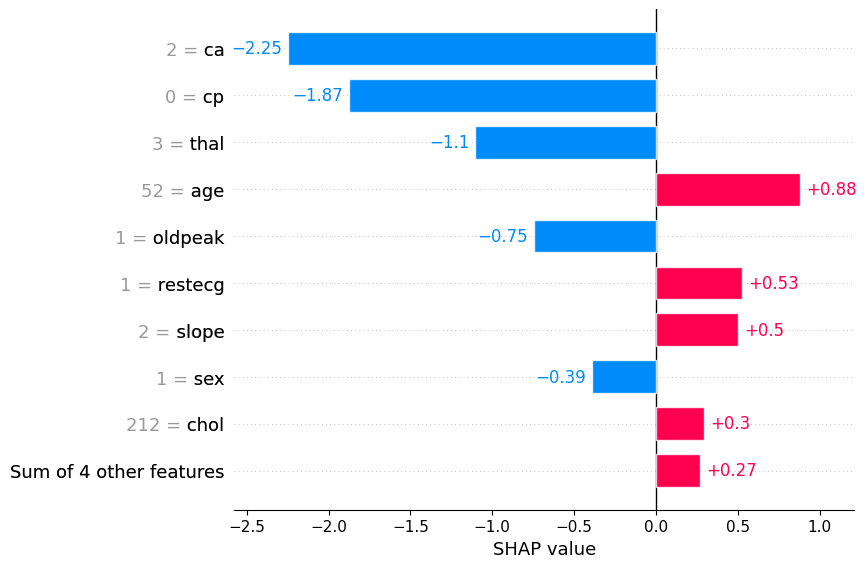

In [ ]:
#visualize the shap values for a specific instance
shap.plots.waterfall(shap_values[0])

#summary plot of shap values
shap.summary_plot(shap_values,X_test)
shap.plots.bar(shap_values[0])

In [ ]:
# Index of the prediction you want to explain
prediction_index = 0

# Get SHAP values for the specific prediction
shap_values_pred = shap_values[prediction_index]

In [ ]:
# Get the absolute SHAP values and corresponding feature names
abs_shap_values = np.abs(shap_values_pred.values)
feature_names = X_train.columns
feature_names_exp = ['Age of the individual',
                     'Gender of the individual',
                     'Chest pain type experienced by the individual',
                     'Resting blood pressure upon admission to the hospital',
                     'Serum cholesterol level',
                     'Fasting blood sugar',
                     'Resting electrocardiographic results',
                     'Maximum heart rate achieved during the Thallium stress test',
                     'Exercise-induced angina',
                     'ST depression induced by exercise relative to rest',
                     'Slope of the peak exercise ST segment',
                     'Number of major vessels colored by fluoroscopy',
                     'Thalassemia type'] # Fixed: Removed extra bracket and trailing commas

feature_names_exp = np.asarray(feature_names_exp)

# Sort the absolute SHAP values and feature names by the absolute SHAP values
sorted_indices = np.argsort(abs_shap_values)[::-1]
sorted_abs_shap_values = abs_shap_values[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]
sorted_feature_names_exp = feature_names_exp[sorted_indices] # Now this should work correctly

In [ ]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.7 MB/s eta 0:00:00


In [ ]:
from langchain_community.llms import HuggingFaceEndpoint


In [ ]:

# Print the features responsible for the prediction
print("Features responsible for the prediction:")
for feature, shap_value in zip(sorted_feature_names,sorted_abs_shap_values):
  print(f"{feature}: {shap_value}")

# Print the expanded features responsible for theprediction
print("Expanded Features responsible for the prediction:")
for feature, shap_value in zip(sorted_feature_names_exp,sorted_abs_shap_values):
  print(f"{feature}: {shap_value}")

ranked_features = sorted(zip(feature_names,abs_shap_values), key=lambda x: x[1], reverse=True)

ranked_features_exp = sorted(zip(feature_names_exp,abs_shap_values), key=lambda x: x[1], reverse=True)

# Construct a prompt based on feature importance
top_features = [f"{ranked_features_exp} with an importance score of {round(float(sorted_abs_shap_values), 2)}" for ranked_features_exp, sorted_abs_shap_values in
ranked_features_exp[:5]]

# Create the prompt
prompt = ("Based on the model's analysis, the prediction was\nprimarily influenced by the following factors: " +
", ".join(top_features) +
". Could you provide a detailed explanation of why these factors are significant?")
print(prompt)
#Chatbot
huggingfacehub_api_token = "Token"
llm = uggingFaceEndpoint(repo_id='tiiuae/falcon-7b-instruct',
                       H   huggingfacehub_api_token=huggingfacehub_api_token)

bot_response = llm.invoke(prompt, temperature=0.2, top_k=10)
bot_response_html = f'<div style="overflow-wrap: break-word; height: auto; padding: 10px;">{bot_response}</div>'

bot_response_html += f'<div style="overflow-wrap: break-word; height: auto; padding: 10px;">{bot_response}</div>'

print(bot_response_html)


Features responsible for the prediction:
ca: 2.247422456741333
cp: 1.8746904134750366
thal: 1.102480173110962
age: 0.881874144077301
oldpeak: 0.745093584060669
restecg: 0.5276440382003784
slope: 0.49842286109924316
sex: 0.3899504244327545
chol: 0.29531002044677734
thalach: 0.28626152873039246
exang: 0.2646339237689972
trestbps: 0.24675054848194122
fbs: 0.03766964375972748
Expanded Features responsible for the prediction:
Number of major vessels colored by fluoroscopy: 2.247422456741333
Chest pain type experienced by the individual: 1.8746904134750366
Thalassemia type: 1.102480173110962
Age of the individual: 0.881874144077301
ST depression induced by exercise relative to rest: 0.745093584060669
Resting electrocardiographic results: 0.5276440382003784
Slope of the peak exercise ST segment: 0.49842286109924316
Gender of the individual: 0.3899504244327545
Serum cholesterol level: 0.29531002044677734
Maximum heart rate achieved during the Thallium stress test: 0.28626152873039246
Exercise-

<ipython-input-68-a9b10ee98d5e>:26: LangChainDeprecationWarning: The class `HuggingFaceEndpoint` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEndpoint``.
  llm = HuggingFaceEndpoint(repo_id='tiiuae/falcon-7b-instruct',


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful
<div style="overflow-wrap: break-word; height: auto; padding: 10px;">
The model's prediction was primarily influenced by the following factors: 1) the number of major vessels colored by fluoroscopy with an importance score of 2.25, indicating that the presence of this finding may indicate a more severe condition; 2) chest pain type experienced by the individual with an importance score of 1.87, as this may indicate a more serious underlying condition; 3) thalassemia type with an importance score of 1.1, as this may indicate a genetic disorder that could contribute to the severity of the condition; 4) age of the individual with an importance score of 0.